In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

#%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

# Set path for file
csvpath = os.path.join("loan.csv")
print(csvpath)

loan.csv


In [2]:
loans_df = pd.read_csv(csvpath)
loans_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pertinent_loans_df = loans_df[[ "annual_inc", "loan_amnt", "term", "int_rate", "total_pymnt", "issue_d", "addr_state", "zip_code", "dti"]]
pertinent_loans_df

,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code,dti
0,55000.0,2500,36 months,13.56,167.020000,Dec-2018,NY,109xx,18.24
1,90000.0,30000,60 months,18.94,1507.110000,Dec-2018,LA,713xx,26.52
2,59280.0,5000,36 months,17.97,353.890000,Dec-2018,MI,490xx,10.51
3,92000.0,4000,36 months,18.94,286.710000,Dec-2018,WA,985xx,16.74
4,57250.0,30000,60 months,16.14,1423.210000,Dec-2018,MD,212xx,26.35
...,...,...,...,...,...,...,...,...,...
2260663,58000.0,12000,60 months,14.08,5360.960000,Oct-2017,VT,054xx,20.88
2260664,30000.0,12000,60 months,25.82,14499.802172,Oct-2017,OR,971xx,19.28
2260665,64000.0,10000,36 months,11.99,5306.940000,Oct-2017,IL,603xx,12.96
2260666,60000.0,12000,60 months,21.45,5207.290000,Oct-2017,AK,996xx,30.82


In [4]:
pertinent_loans_df["annual_inc"].max()

110000000.0

In [5]:
# Create the bins in which annual_inc will be held, based on tax brackets
bins = [0, 9700, 39475, 84200, 160725, 204100, 510300, 110000000]


# Create the names for the four bins
income_tiers = ["Tier_One", "Tier_Two", "Tier_Three", "Tier_Four", "Tier_Five", "Tier_Six", "Tier_Seven"]

In [6]:
a = pd.cut(pertinent_loans_df["annual_inc"], bins, labels=income_tiers)
a.head()

0    Tier_Three
1     Tier_Four
2    Tier_Three
3     Tier_Four
4    Tier_Three
Name: annual_inc, dtype: category
Categories (7, object): [Tier_One < Tier_Two < Tier_Three < Tier_Four < Tier_Five < Tier_Six < Tier_Seven]

In [7]:
pertinent_loans_df["tier_group"] = a
pertinent_loans_df.head()

,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code,dti,tier_group
0,55000.0,2500,36 months,13.56,167.02,Dec-2018,NY,109xx,18.24,Tier_Three
1,90000.0,30000,60 months,18.94,1507.11,Dec-2018,LA,713xx,26.52,Tier_Four
2,59280.0,5000,36 months,17.97,353.89,Dec-2018,MI,490xx,10.51,Tier_Three
3,92000.0,4000,36 months,18.94,286.71,Dec-2018,WA,985xx,16.74,Tier_Four
4,57250.0,30000,60 months,16.14,1423.21,Dec-2018,MD,212xx,26.35,Tier_Three


In [8]:
# Create a GroupBy object based upon "View Group"
loan_group = pertinent_loans_df.groupby("tier_group")

# Find how many rows fall into each bin
print(loan_group["annual_inc"].count())

# Get the average of each column within the GroupBy object
loan_group[["int_rate", "loan_amnt", "annual_inc"]].mean()

tier_group
Tier_One         2954
Tier_Two       343095
Tier_Three    1196274
Tier_Four      604591
Tier_Five       59806
Tier_Six        48894
Tier_Seven       3383
Name: annual_inc, dtype: int64


,int_rate,loan_amnt,annual_inc
tier_group,,,
Tier_One,14.813074,11096.267773,6.529720e+03
Tier_Two,13.962959,8677.464842,2.989422e+04
Tier_Three,13.252005,13711.771613,5.970080e+04
Tier_Four,12.506046,19535.365230,1.101832e+05
Tier_Five,11.945691,23553.136809,1.814288e+05
Tier_Six,11.709249,25823.841371,2.769104e+05
Tier_Seven,11.682722,26295.876441,1.068499e+06


In [9]:
sample3 = pertinent_loans_df.sample(100)
sample3.head()

,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code,dti,tier_group
1739388,275000.0,31300,36 months,24.89,15011.220000,Aug-2013,NY,100xx,6.44,Tier_Six
480312,70566.0,6000,36 months,6.08,2370.680000,Jan-2018,NJ,077xx,15.18,Tier_Three
1403105,38000.0,4000,36 months,11.44,3160.420000,Feb-2017,NY,100xx,16.19,Tier_Two
1966991,110000.0,35000,60 months,24.08,4034.040000,Jul-2014,NH,031xx,31.59,Tier_Four
958386,42000.0,12000,36 months,13.18,13537.590736,Dec-2015,VA,226xx,10.43,Tier_Three


In [10]:
population = pertinent_loans_df["dti"].mean()
population

18.82419643667267

In [17]:
new_df = pertinent_loans_df[pertinent_loans_df["addr_state"] == "DC"]
new_df.head()

,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code,dti,tier_group
154,100203.0,18000,36 months,8.81,1128.40,Dec-2018,DC,200xx,12.30,Tier_Four
1325,340000.0,27000,60 months,10.33,1132.90,Dec-2018,DC,200xx,11.94,Tier_Six
1387,90000.0,14500,60 months,10.72,613.55,Dec-2018,DC,200xx,18.95,Tier_Four
1397,70000.0,20000,36 months,6.46,1160.64,Dec-2018,DC,200xx,13.98,Tier_Three
1917,300000.0,40000,36 months,7.56,2465.52,Dec-2018,DC,200xx,10.09,Tier_Six


In [18]:
type(new_df['dti'])

pandas.core.series.Series

In [32]:


def gendata(loc=0):
    population = pertinent_loans_df["dti"]
    sample3 = new_df['dti']
    
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample3)), sample3, label="sample")
    plt.legend()
    
       # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 10, density=True, alpha=0.7, label="population")
    plt.hist(sample3, 10, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample3.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample3

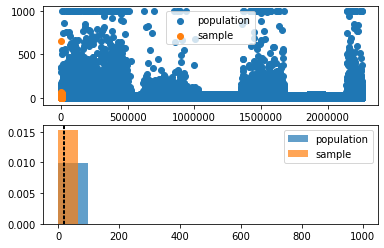

In [33]:
population, sample3 = gendata()

In [34]:
population = population.dropna(how= "any") 
sample3 = sample3.dropna(how="any")

In [35]:
stats.ttest_1samp(sample3, population.mean())

Ttest_1sampResult(statistic=-19.08616899459347, pvalue=1.2762598752062079e-78)

In [23]:
new2_df = pertinent_loans_df[pertinent_loans_df["addr_state"] == "ID"]
new2_df.head()

,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code,dti,tier_group
412,200000.0,15000,36 months,7.56,15063.00,Dec-2018,ID,836xx,2.62,Tier_Five
591,25440.0,5000,36 months,13.56,719.01,Dec-2018,ID,834xx,6.23,Tier_Two
675,27064.0,10000,36 months,11.31,325.73,Dec-2018,ID,836xx,19.78,Tier_Two
854,50000.0,10000,36 months,6.46,309.91,Dec-2018,ID,833xx,24.75,Tier_Three
1266,30000.0,10000,36 months,14.47,676.08,Dec-2018,ID,836xx,6.84,Tier_Two


In [43]:
sample4 = pertinent_loans_df.sample(1000)
sample4.head()

,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code,dti,tier_group
880903,75000.00,10000,60 months,13.99,11959.922200,Nov-2016,NC,275xx,23.30,Tier_Three
782314,54000.00,16000,36 months,12.99,5595.350000,Feb-2016,GA,315xx,30.98,Tier_Three
1416347,22000.00,4500,36 months,13.99,3693.740000,Jan-2017,NC,278xx,19.53,Tier_Two
981575,89260.32,5000,36 months,6.89,5544.976396,Nov-2015,MD,207xx,9.09,Tier_Four
810081,105500.00,34350,36 months,19.48,11934.530000,Jan-2016,FL,320xx,20.93,Tier_Four


In [44]:

def gendata1(loc=0):
    population = pertinent_loans_df["dti"]
    sample4 = new_df['dti']
    
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample4)), sample4, label="sample")
    plt.legend()
    
       # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 10, density=True, alpha=0.7, label="population")
    plt.hist(sample4, 10, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample4.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample4

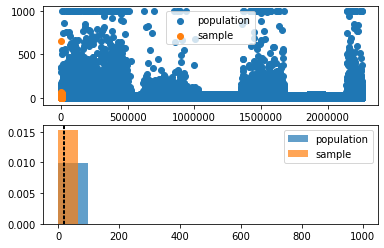

In [45]:
population, sample4 = gendata1()

In [46]:
population = population.dropna(how= "any") 
sample4 = sample4.dropna(how="any")

In [47]:
stats.ttest_1samp(sample4, population.mean())

Ttest_1sampResult(statistic=-19.08616899459347, pvalue=1.2762598752062079e-78)

In [42]:
stats.ttest_1samp(sample4, population.mean())

Ttest_1sampResult(statistic=-19.08616899459347, pvalue=1.2762598752062079e-78)